# TP1: Análisis exploratorio bike's share

In [54]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta
plt.style.use('default')
plt.rcParams['figure.figsize']=(17,8)

In [55]:
chunks=pd.read_csv('trip.csv',sep=',',iterator=True,chunksize=10000)
trips = pd.concat([chunk for chunk in chunks])
trips_con_fecha=trips

trips_con_fecha.columns.values

print(trips_con_fecha.shape)

print(trips_con_fecha.isnull().any())

trips_con_fecha['date']= pd.to_datetime(trips['start_date'], format = '%m/%d/%Y  %H:%M')
# hago un split de la fecha y la hora
trips_con_fecha['anio'] = pd.DatetimeIndex(trips_con_fecha['date']).year
trips_con_fecha['mes'] = pd.DatetimeIndex(trips_con_fecha['date']).month
trips_con_fecha['dia'] = pd.DatetimeIndex(trips_con_fecha['date']).day
trips_con_fecha['hora'] = pd.DatetimeIndex(trips_con_fecha['date']).hour
trips_con_fecha['minutos'] = pd.DatetimeIndex(trips_con_fecha['date']).minute

print(trips_con_fecha.describe())

(669959, 11)
id                    False
duration              False
start_date            False
start_station_name    False
start_station_id      False
end_date              False
end_station_name      False
end_station_id        False
bike_id               False
subscription_type     False
zip_code               True
dtype: bool
                  id      duration  start_station_id  end_station_id  \
count  669959.000000  6.699590e+05     669959.000000   669959.000000   
mean   460382.009899  1.107950e+03         57.851876       57.837438   
std    264584.458487  2.225544e+04         17.112474       17.200142   
min      4069.000000  6.000000e+01          2.000000        2.000000   
25%    231082.500000  3.440000e+02         50.000000       50.000000   
50%    459274.000000  5.170000e+02         62.000000       62.000000   
75%    692601.000000  7.550000e+02         70.000000       70.000000   
max    913460.000000  1.727040e+07         84.000000       84.000000   

             bike_

# Veo Cantidad por año

<IPython.core.display.Javascript object>


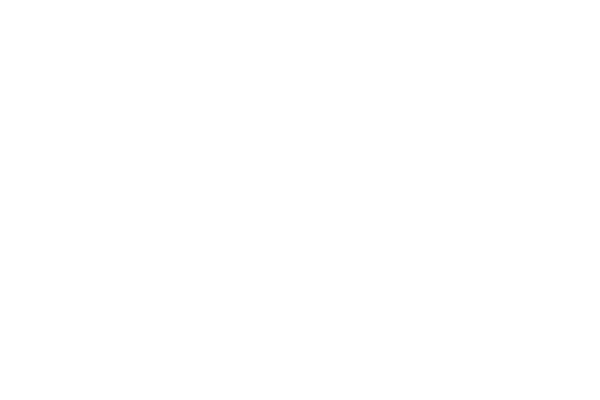

In [56]:
%matplotlib notebook
tri=trips_con_fecha['anio'].value_counts()
ax=tri.plot(kind='bar',title='Cantidad por anio',color='green')
ax.set_ylabel('anio')
ax.set_xlabel('cantidad')

# cantidad por dia de la semana (ORDENAR??)

<IPython.core.display.Javascript object>


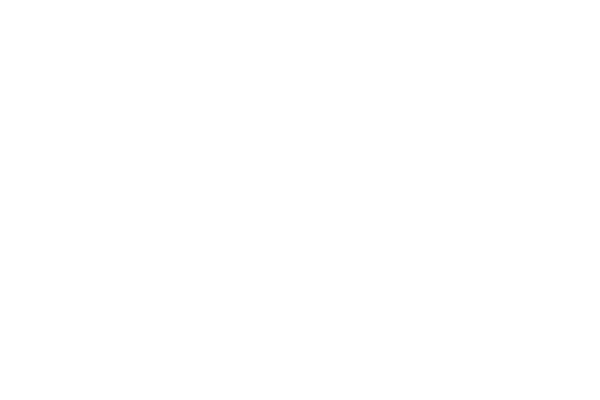

In [57]:
%matplotlib notebook
trips_con_fecha['dia']= trips_con_fecha['date'].dt.dayofweek
tri=trips_con_fecha['dia'].value_counts()
ax=tri.plot(kind='bar',title='Cantidad por dia de la semana',color='green')
ax.set_ylabel('dia')
ax.set_xlabel('cantidad')

# Cantidad por suscripcion

<IPython.core.display.Javascript object>


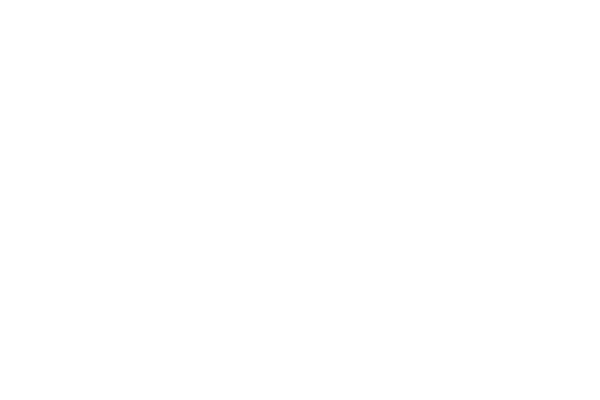

In [58]:
# cantidad total de cada suscripcion
%matplotlib notebook
sub=trips_con_fecha['subscription_type'].value_counts()
su=sub.plot(kind='bar',title='Cantidad por suscripcion',color='green')
su.set_ylabel('Tipo de Suscripcion')
su.set_xlabel('cantidad')

# Cantidades sacadas por hora (ordenar???)

<IPython.core.display.Javascript object>


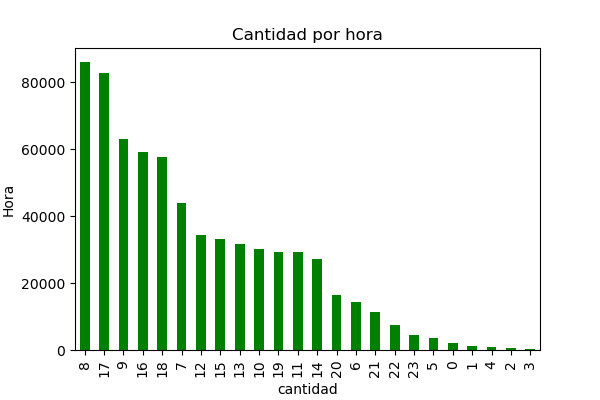

In [59]:
%matplotlib notebook
sub=trips_con_fecha['hora'].value_counts()
su=sub.plot(kind='bar',title='Cantidad por hora',color='green')
su.set_ylabel('Hora')
su.set_xlabel('cantidad')

# Duraciones en segundos

<IPython.core.display.Javascript object>


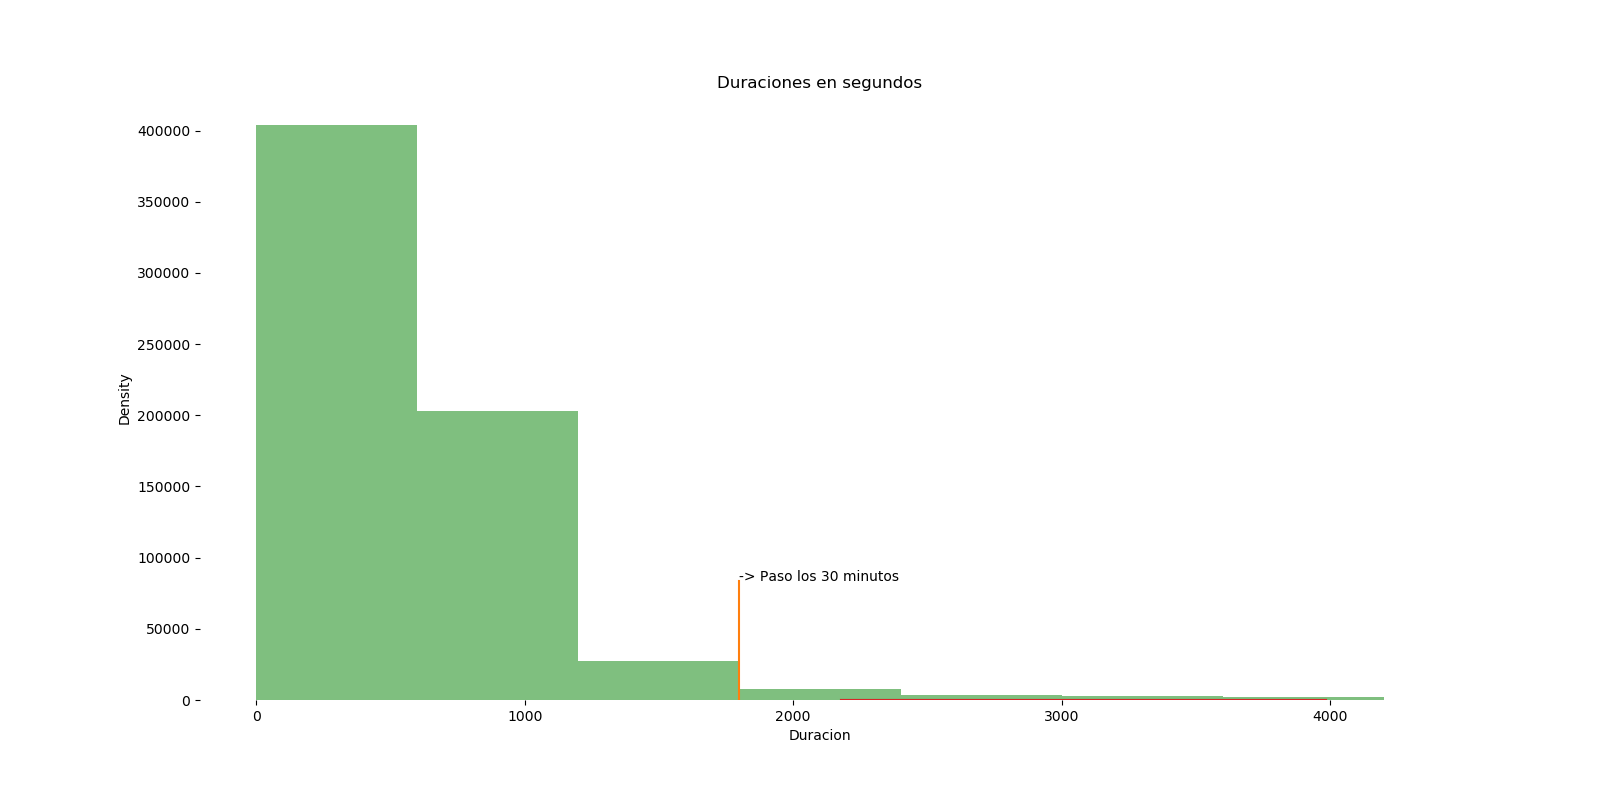

In [60]:
plt.figure(figsize = [9,7])
h = plt.hist(trips_con_fecha['duration'].values,range = [0,4200],alpha = .5,bins=7,facecolor='green')
plt.plot([1800,1800],[0,float(trips_con_fecha.shape[0]/8)],linestyle = '-')
plt.text(1800,float(trips_con_fecha.shape[0]/8),'-> Paso los 30 minutos')
plt.title('Duraciones en segundos')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.xlabel('Duracion')
plt.legend()

# Porcentaje de bicis sacadas que no cumplieron el maximo de 30 minutos 

In [61]:
val=trips_con_fecha.loc[trips_con_fecha['duration'] > 1800,:]['duration'].count()/float(trips_con_fecha['duration'].count())   
print(val*100)

5.23539500178


# Porcentaje de bicis sacadas que no cumplieron el maximo de 30 minutos para 24-hour or 3-day membership

In [62]:
val=trips_con_fecha.loc[(trips_con_fecha['duration'] > 1800) & (trips_con_fecha['subscription_type'] == 'Customer'),:]\
                        ['duration'].count()/float(trips_con_fecha['duration'].count())   
print(val*100)


4.66700201057


# Porcentaje de bicis sacadas que no cumplieron el maximo de 30 minutos para annual membership

In [63]:
val=trips_con_fecha.loc[(trips_con_fecha['duration'] > 1800) & (trips_con_fecha['subscription_type'] == 'Subscriber'),:]\
                        ['duration'].count()/float(trips_con_fecha['duration'].count())   
print(val*100)

0.568392991213


# Ratio: cantidad de bicis devueltas/cantidad de bici alquiladas en una estacion

In [115]:
#cantidad total de trips que salieron de cada estacion
estacion_count=trips_con_fecha['start_station_name'].value_counts()
ES=trips_con_fecha.loc[trips_con_fecha['start_station_name']==trips_con_fecha['end_station_name'],:]
trips_con_mismaE=ES['start_station_name'].value_counts()
ratioMISMAES=trips_con_mismaE/ estacion_count


In [114]:
top20=ratioMISMAES.sort_values(ascending=False)[:20]
top20

University and Emerson                   0.591270
San Mateo County Center                  0.292683
Redwood City Public Library              0.253521
San Jose Civic Center                    0.245295
Broadway at Main                         0.238806
California Ave Caltrain Station          0.207602
Palo Alto Caltrain Station               0.187589
Franklin at Maple                        0.169643
Arena Green / SAP Center                 0.145722
Rengstorff Avenue / California Street    0.141718
Cowper at University                     0.122999
Japantown                                0.120419
Park at Olive                            0.120000
Stanford in Redwood City                 0.112385
Evelyn Park and Ride                     0.107978
Mezes Park                               0.105572
Redwood City Caltrain Station            0.099743
San Jose City Hall                       0.095696
San Salvador at 1st                      0.094563
SJSU 4th at San Carlos                   0.094017


# Las 10 estaciones con mas bicis de salida (de lunes a viernes)


In [118]:
#top_salidas_semana=trips_con_fecha[['date','start_station_name']]
#los dias van de 0 a 6
semana=trips_con_fecha.loc[(trips_con_fecha['dia']== 0) | (trips_con_fecha['dia']== 1) |(trips_con_fecha['dia']== 2) | (trips_con_fecha['dia']== 3)| (trips_con_fecha['dia']== 4),:]
semana_stats=semana['start_station_name'].value_counts()

In [119]:
top10_salida_lu_vie=semana_stats.sort_values(ascending=False)[:10]
top10_salida_lu_vie

San Francisco Caltrain (Townsend at 4th)         46234
San Francisco Caltrain 2 (330 Townsend)          31706
Harry Bridges Plaza (Ferry Building)             26520
Temporary Transbay Terminal (Howard at Beale)    25084
2nd at Townsend                                  22723
Steuart at Market                                22594
Market at Sansome                                21932
Townsend at 7th                                  21655
Embarcadero at Sansome                           21094
Market at 10th                                   17968
Name: start_station_name, dtype: int64

# Las 10 estaciones con menos bicis de salida (de lunes a viernes)

In [68]:
top10_lu_vie=semana_stats.sort_values(ascending=True)[:10]
top10_lu_vie

San Jose Government Center          22
Broadway at Main                    52
Franklin at Maple                  148
Redwood City Public Library        157
San Mateo County Center            258
Mezes Park                         287
Redwood City Medical Center        294
Stanford in Redwood City           416
Park at Olive                      574
California Ave Caltrain Station    701
Name: start_station_name, dtype: int64

# Las 10 estaciones con mas bicis de salida (sabado y domingo)

In [125]:
finde=trips_con_fecha.loc[(trips_con_fecha['dia']==5) | (trips_con_fecha['dia']==6),:]
finde_stats=finde['start_station_name'].value_counts()
top10=finde_stats.sort_values(ascending=False)[:10]
top10

Embarcadero at Sansome                      6619
Harry Bridges Plaza (Ferry Building)        6414
Market at 4th                               3486
Embarcadero at Bryant                       3227
2nd at Townsend                             3114
Powell Street BART                          2990
Grant Avenue at Columbus Avenue             2864
San Francisco Caltrain (Townsend at 4th)    2858
Powell at Post (Union Square)               2357
Market at 10th                              2304
Name: start_station_name, dtype: int64

# Las 10 estaciones con menos bicis de salida (sabado y domingo)

In [70]:
top10_Sab_Dom=finde_stats.sort_values(ascending=True)[:10]
top10_Sab_Dom

San Jose Government Center          22
Broadway at Main                    52
Franklin at Maple                  148
Redwood City Public Library        157
San Mateo County Center            258
Mezes Park                         287
Redwood City Medical Center        294
Stanford in Redwood City           416
Park at Olive                      574
California Ave Caltrain Station    701
Name: start_station_name, dtype: int64

# Las 10 estaciones mas populares de salida de dia laboral en horario pico(7 a 9 y 16 a 18)

In [126]:
trips_con_fecha['dateFin']= pd.to_datetime(trips['end_date'], format = '%m/%d/%Y  %H:%M')
trips_con_fecha['anioE'] = pd.DatetimeIndex(trips_con_fecha['dateFin']).year
trips_con_fecha['mesE'] = pd.DatetimeIndex(trips_con_fecha['dateFin']).month
trips_con_fecha['diaE'] = pd.DatetimeIndex(trips_con_fecha['dateFin']).day
trips_con_fecha['horaE'] = pd.DatetimeIndex(trips_con_fecha['dateFin']).hour
trips_con_fecha['minutosE'] = pd.DatetimeIndex(trips_con_fecha['dateFin']).minute

semana_hora_pico=trips_con_fecha.loc[((trips_con_fecha['horaE']>= 7 )& (trips_con_fecha['horaE']<=9)) |((trips_con_fecha['horaE']>= 16) & \
                    (trips_con_fecha['horaE']<=18)),:]

estacionesHorarioPico=semana_hora_pico['start_station_name'].value_counts()
top10estacionesHorarioPico=estacionesHorarioPico.sort_values(ascending=False)[:10]
top10estacionesHorarioPico


San Francisco Caltrain (Townsend at 4th)         35048
San Francisco Caltrain 2 (330 Townsend)          23234
Temporary Transbay Terminal (Howard at Beale)    19259
Harry Bridges Plaza (Ferry Building)             18970
Steuart at Market                                16249
2nd at Townsend                                  15842
Townsend at 7th                                  14386
Embarcadero at Sansome                           14137
Market at Sansome                                12976
Market at 10th                                   11840
Name: start_station_name, dtype: int64

# Las 10 viajes mas populares de dia de semana en horario pico(7 a 9 y 16 a 18)

In [127]:
viajesPopulares = semana_hora_pico[['start_station_name','end_station_name','id']].groupby(['start_station_name','end_station_name'])['id'].count()
top20=viajesPopulares.sort_values(ascending=False)[:10]
top20

start_station_name                             end_station_name                        
San Francisco Caltrain 2 (330 Townsend)        Townsend at 7th                             3658
2nd at Townsend                                Harry Bridges Plaza (Ferry Building)        3264
Harry Bridges Plaza (Ferry Building)           2nd at Townsend                             3243
Embarcadero at Folsom                          San Francisco Caltrain (Townsend at 4th)    3191
Townsend at 7th                                San Francisco Caltrain (Townsend at 4th)    3182
Embarcadero at Sansome                         Steuart at Market                           3093
Harry Bridges Plaza (Ferry Building)           Embarcadero at Sansome                      3075
Steuart at Market                              2nd at Townsend                             2945
Temporary Transbay Terminal (Howard at Beale)  San Francisco Caltrain (Townsend at 4th)    2920
Steuart at Market                              S

# Top10 de viajes con mayor promedio de duracion, de dia de semana y en horario pico 

In [128]:
info_viajes_Populares = semana_hora_pico[['start_station_name','end_station_name','duration']].groupby(['start_station_name','end_station_name'])['duration'].agg([np.size,np.mean,np.std])
info_viajes_Populares.loc[info_viajes_Populares['size']>2000,:].sort_values('mean',ascending=False).head(10)

size  \
start_station_name                            end_station_name                                      
Harry Bridges Plaza (Ferry Building)          Embarcadero at Sansome                         3075   
                                              San Francisco Caltrain (Townsend at 4th)       2182   
San Francisco Caltrain (Townsend at 4th)      Market at Sansome                              2039   
Market at 10th                                San Francisco Caltrain (Townsend at 4th)       2535   
San Francisco Caltrain (Townsend at 4th)      Harry Bridges Plaza (Ferry Building)           2681   
                                              Temporary Transbay Terminal (Howard at Beale)  2599   
Steuart at Market                             San Francisco Caltrain (Townsend at 4th)       2709   
Embarcadero at Folsom                         San Francisco Caltrain (Townsend at 4th)       3191   
San Francisco Caltrain (Townsend at 4th)      Steuart at Market                              2357   
Temporary Transbay Terminal (Howard at Beale) San Francisco Caltrain (Townsend at 4th)       2920   

                                                                                                    mean  \
start_station_name                            end_station_name                                             
Harry Bridges Plaza (Ferry Building)          Embarcadero at Sansome                         1063.781138   
                                              San Francisco Caltrain (Townsend at 4th)        831.148029   
San Francisco Caltrain (Townsend at 4th)      Market at Sansome                               823.132908   
Market at 10th                                San Francisco Caltrain (Townsend at 4th)        786.864300   
San Francisco Caltrain (Townsend at 4th)      Harry Bridges Plaza (Ferry Building)            745.986945   
                                              Temporary Transbay Terminal (Howard at Beale)   726.017314   
Steuart at Market                             San Francisco Caltrain (Townsend at 4th)        725.410853   
Embarcadero at Folsom                         San Francisco Caltrain (Townsend at 4th)        701.274835   
San Francisco Caltrain (Townsend at 4th)      Steuart at Market                               699.029699   
Temporary Transbay Terminal (Howard at Beale) San Francisco Caltrain (Townsend at 4th)        644.416438   

                                                                                                     std  
start_station_name                            end_station_name                                            
Harry Bridges Plaza (Ferry Building)          Embarcadero at Sansome                         2513.807266  
                                              San Francisco Caltrain (Townsend at 4th)        774.523982  
San Francisco Caltrain (Townsend at 4th)      Market at Sansome                              2452.355243  
Market at 10th                                San Francisco Caltrain (Townsend at 4th)       4523.796296  
San Francisco Caltrain (Townsend at 4th)      Harry Bridges Plaza (Ferry Building)           1281.758765  
                                              Temporary Transbay Terminal (Howard at Beale)  1632.042390  
Steuart at Market                             San Francisco Caltrain (Townsend at 4th)       1512.311844  
Embarcadero at Folsom                         San Francisco Caltrain (Townsend at 4th)       2440.397087  
San Francisco Caltrain (Townsend at 4th)      Steuart at Market                               207.878007  
Temporary Transbay Terminal (Howard at Beale) San Francisco Caltrain (Townsend at 4th)        850.007864

# Top10 de viajes de dia de semana y en horario pico con duracion mas variable

In [129]:
info_viajes_Populares.loc[info_viajes_Populares['size']>2000,:].sort_values('std',ascending=False).head(10)

,,size,mean,std
start_station_name,end_station_name,,,
Market at 10th,San Francisco Caltrain (Townsend at 4th),2535,786.864300,4523.796296
Market at Sansome,2nd at South Park,2262,443.255526,2880.419426
Mountain View Caltrain Station,Mountain View City Hall,2085,411.705995,2692.106160
Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,3075,1063.781138,2513.807266
San Francisco Caltrain (Townsend at 4th),Market at Sansome,2039,823.132908,2452.355243
Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),3191,701.274835,2440.397087
Steuart at Market,Embarcadero at Sansome,2025,632.006420,1707.484570
San Francisco Caltrain (Townsend at 4th),Temporary Transbay Terminal (Howard at Beale),2599,726.017314,1632.042390
Steuart at Market,San Francisco Caltrain (Townsend at 4th),2709,725.410853,1512.311844


# Los 10 viajes mas populares de fin de semana

In [130]:
weekend=trips_con_fecha.loc[(trips_con_fecha['dia']== 5) | (trips_con_fecha['dia']== 6),: ]
weekend_popular_trips = weekend[['start_station_name','end_station_name','id']].groupby(['start_station_name','end_station_name'])['id'].count()
top10weekend=weekend_popular_trips.sort_values(ascending=False)[:10]
top10weekend

start_station_name                    end_station_name                    
Harry Bridges Plaza (Ferry Building)  Embarcadero at Sansome                  1550
Embarcadero at Sansome                Harry Bridges Plaza (Ferry Building)     907
                                      Embarcadero at Sansome                   873
Harry Bridges Plaza (Ferry Building)  Harry Bridges Plaza (Ferry Building)     841
Embarcadero at Bryant                 Embarcadero at Sansome                   483
                                      Harry Bridges Plaza (Ferry Building)     459
Embarcadero at Vallejo                Embarcadero at Sansome                   451
University and Emerson                University and Emerson                   448
2nd at Townsend                       Harry Bridges Plaza (Ferry Building)     415
Powell Street BART                    Market at 10th                           412
Name: id, dtype: int64

# Trips y Weather

In [81]:
chunks2=pd.read_csv('weather.csv',sep=',',iterator=True,chunksize=3000)
clima = pd.concat([chunk for chunk in chunks2])
clima[:2]
clima.isnull().sum()
clima.zip_code.unique()

date                                 0
max_temperature_f                    4
mean_temperature_f                   4
min_temperature_f                    4
max_dew_point_f                     54
mean_dew_point_f                    54
min_dew_point_f                     54
max_humidity                        54
mean_humidity                       54
min_humidity                        54
max_sea_level_pressure_inches        1
mean_sea_level_pressure_inches       1
min_sea_level_pressure_inches        1
max_visibility_miles                13
mean_visibility_miles               13
min_visibility_miles                13
max_wind_Speed_mph                   1
mean_wind_speed_mph                  1
max_gust_speed_mph                 899
precipitation_inches                 1
cloud_cover                          1
events                            3143
wind_dir_degrees                     1
zip_code                             0
dtype: int64

In [83]:
#veo que zipcode tiene menor cantidad de nulls porque para cada fecha hay un registro por zipcode
for zip_code in clima.zip_code.unique():
    print zip_code
    print (clima[clima.zip_code == zip_code].isnull().sum())
    print ()

94107
date                                0
max_temperature_f                   0
mean_temperature_f                  0
min_temperature_f                   0
max_dew_point_f                     0
mean_dew_point_f                    0
min_dew_point_f                     0
max_humidity                        0
mean_humidity                       0
min_humidity                        0
max_sea_level_pressure_inches       0
mean_sea_level_pressure_inches      0
min_sea_level_pressure_inches       0
max_visibility_miles                0
mean_visibility_miles               0
min_visibility_miles                0
max_wind_Speed_mph                  0
mean_wind_speed_mph                 0
max_gust_speed_mph                 13
precipitation_inches                0
cloud_cover                         0
events                            574
wind_dir_degrees                    0
zip_code                            0
dtype: int64
()
94063
date                                0
max_temperature_f     

In [131]:
#94107 es el zip code con menos NULL
clima_f=clima.loc[clima['zip_code']==94107,:]

In [143]:
clima_f['date']= pd.to_datetime(clima_f['date'], format = '%m/%d/%Y')
clima_f['anio'] = pd.DatetimeIndex(clima_f['date']).year
clima_f['mes'] = pd.DatetimeIndex(clima_f['date']).month
clima_f['dia'] = pd.DatetimeIndex(clima_f['date']).day
clima_f.events.unique()
clima_f.loc[clima_f.events == 'rain', 'events'] = "Rain"
clima_f.loc[clima_f.events.isnull(), 'events'] = "NoHayEvento"
trips_clima=pd.merge(trips_con_fecha,clima_f,how='left',on=['anio','mes','dia'])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

<IPython.core.display.Javascript object>


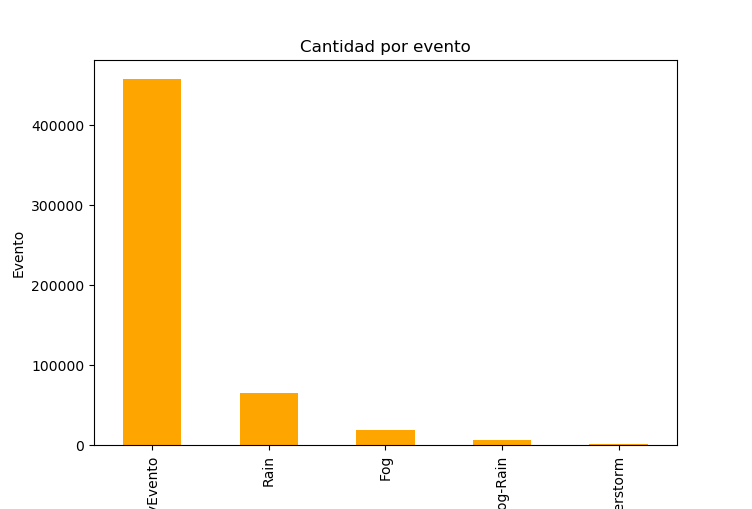

In [144]:
%matplotlib notebook
sub_clima=trips_clima['events'].value_counts()
sub_plot=sub_clima.plot(kind='bar',title='Cantidad por evento',color='orange')
sub_plot.set_ylabel('Evento')
sub_plot.set_xlabel('cantidad')

# cantidad de trips desde cada ciudad

In [28]:
chunks3=pd.read_csv('station.csv',sep=',',iterator=True,chunksize=3000)
estaciones = pd.concat([chunk for chunk in chunks3])
estaciones[:2]
print(estaciones.isnull().any())

id                   False
name                 False
lat                  False
long                 False
dock_count           False
city                 False
installation_date    False
dtype: bool


In [39]:
trips_con_fecha['id']=trips_con_fecha['start_station_id']
trips_estaciones=pd.merge(trips_con_fecha,estaciones,on=['id'],how='left')
ciudades_stats=trips_estaciones['city'].value_counts()
ciudades_stats

San Francisco    603708
San Jose          37878
Mountain View     18167
Palo Alto          6773
Redwood City       3433
Name: city, dtype: int64